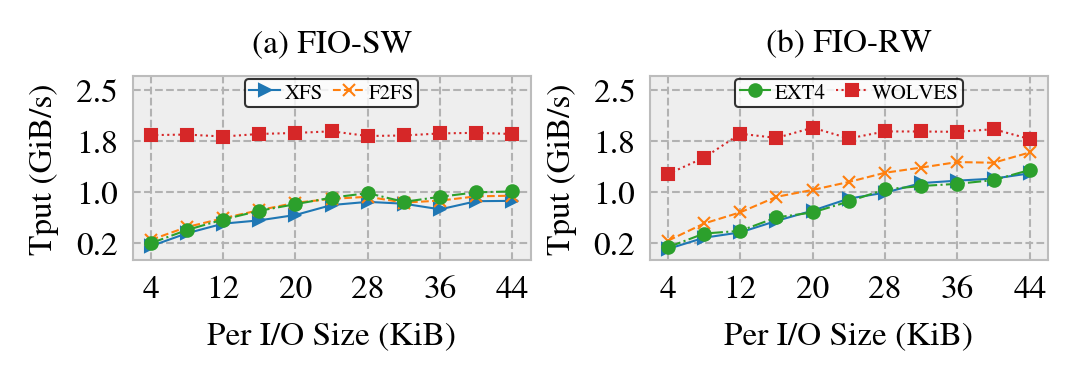

In [ ]:
# ipython -c "%run plot.ipynb"

import matplotlib
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams["hatch.color"] = "black"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

df.drop(df[df['file_system'] == "PMM"].index, inplace=True)
df.drop(df[df['file_system'] == "URFS-256"].index, inplace=True)
df.drop(df[df['file_system'] == "URFS-512"].index, inplace=True)
df.drop(df[df['file_system'] == "URFS-1024"].index, inplace=True)
# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(3)))

line_width = 0.5
# colors = ["#2b2d42", "#8d99ae", "#1a535c", "#ef233c", "#4ecdc4"]
marks = [">", "x", "o", "s", "|", "v", "*", "_"]
# seven line types
line_types = ["-", "--", "-.", ":", "-", "--", "-."]
subtitles = ["(a) FIO-SW", "(b) FIO-RW"]
ops = ["write-data-no-prealloc", "randwrite-data-no-prealloc"]
# bsize = [256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072]
bsize =[4096, 8192, 12288, 16384, 20480, 24576, 28672, 32768, 36864, 40960, 45056]

# gs0 = gridspec.GridSpec(2, 2, figure=fig, wspace=0.3, hspace=0.6)
lines = []
cmap = "tab10"
all_fss = []
for op_idx, op in enumerate(ops):
    subfig = plt.subplot(1, 2, op_idx + 1)
    # subfig = plt.subplot(gs0[op_idx])
    fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
    all_fss.extend(fss)
    for idx, fs in enumerate(fss):
        if fs == "PMM":
            continue
        if fs == "KILLER":
            line, = plt.plot(bsize, df[(df['file_system'] == fs) & (df['ops'] == op)]['bandwidth(MiB/s)'] / 1024, color=plt.get_cmap(cmap)(idx), markerfacecolor=plt.get_cmap(cmap)(idx), linewidth=line_width,label=fs, marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx], zorder=10)
        else:
            line, = plt.plot(bsize, df[(df['file_system'] == fs) & (df['ops'] == op)]['bandwidth(MiB/s)'] / 1024, color=plt.get_cmap(cmap)(idx), markerfacecolor=plt.get_cmap(cmap)(idx), linewidth=line_width,label=fs, marker=marks[idx], markersize=3, markeredgewidth=0.5, linestyle=line_types[idx])
        
        # plt.scatter(num_jobs, df[(df['file_system'] == fs) & (df['ops'] == op)]['bandwidth(MiB/s)'] / 1024, color=plt.get_cmap(cmap)(idx), s=0.1)
        lines.append(line)
        
    # if op_idx == 1:
    #     plt.vlines(x=16 * 1024, ymin=df[(df['file_system'] == fss[1]) & (df['ops'] == op)]['bandwidth(MiB/s)'].iloc[3] / 1024, ymax=df[(df['file_system'] == fss[2]) & (df['ops'] == op)]['bandwidth(MiB/s)'].iloc[3] / 1024, color=plt.get_cmap(cmap)(3), linestyle='--', linewidth=0.5)
        
    #     plt.text(24 * 1024, (df[(df['file_system'] == fss[1]) & (df['ops'] == op)]['bandwidth(MiB/s)'].iloc[3] / 1024 + df[(df['file_system'] == fss[2]) & (df['ops'] == op)]['bandwidth(MiB/s)'].iloc[3] / 1024) / 2, 
    #     "%.2f ×" % (df[(df['file_system'] == fss[2]) & (df['ops'] == op)]['bandwidth(MiB/s)'].iloc[3] / df[(df['file_system'] == fss[1]) & (df['ops'] == op)]['bandwidth(MiB/s)'].iloc[3]), fontsize=6, ha='right', va='bottom', color=plt.get_cmap(cmap)(3))
        
        
        # string
            
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    # plt.xticks([1024, 8192, 16384, 24576, 32768], labels=[1, 8, 16, 24, 32], fontsize=8)
    # ax.set_xscale('log', base=2)
    selected_bsize = bsize # [512, 2048, 8192, 32768, 131072]
    # plt.xticks(selected_bsize, [ round(b / 1024) if round(b / 1024) != 0 else "1/2" if b == 512 else "1/4" for b in selected_bsize], fontsize=7)
    plt.xticks([4096, 12288, 20480, 28672, 36864, 45056], labels=[ 4, 12, 20, 28, 36, 44], fontsize=8)
    plt.tick_params(bottom=False, top=False, left=False, right=False)
    # if op_idx == 0:
    #     plt.ylabel('Throughput (GiB/s)', fontsize=8)
    # if op_idx == 0 or op_idx == 1:
    #     plt.yticks(np.linspace(0.25, 2.25, 4), fontsize=8)
    # else:
    #     plt.yticks(np.linspace(1, 6.6, 4), fontsize=8)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
    # subfig.text(0.5, -0.3, "Threads (#.)", ha='center', va='center', fontsize=6, transform=subfig.transAxes)
    plt.xlabel("Per I/O Size (KiB)", fontsize=8) 
    plt.title(subtitles[op_idx], fontsize=8, loc='center')
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=8)
    plt.ylabel('Tput (GiB/s)', fontsize=8)
    plt.ylim(0,  2.7)
    if op_idx == 0 or op_idx == 1:
        plt.yticks(np.linspace(0.25, 2.5, 4), fontsize=8)
    else:
        plt.yticks(np.linspace(0.25, 1.5, 4), fontsize=8)


# steps = [2, 2, 2, 1]
# all_fss.replace("URFS-256", "URFS-256MiB (no merge)", inplace=True)
# all_fss.replace("URFS-512", "URFS-512MiB (single merge)", inplace=True)
# all_fss.replace("URFS-1024", "URFS", inplace=True)
all_fss = pd.Series(all_fss)
all_fss.replace("KILLER-DATAFRAG", "DataFrag (no contiguous blocks)", inplace=True)
all_fss.replace("KILLER-DATA-PKGFRAG", "Data+PkgFrag", inplace=True)
all_fss.replace("KILLER-DATA-PKG-DEFRAG", "Defrag", inplace=True)
all_fss.replace("KILLER", "WOLVES", inplace=True)

steps = [2, 2, 0, 0]
for ax_id, ax in enumerate(fig.axes):
    if steps[ax_id] == 0:
        continue
    start = sum(steps[:ax_id])
    end = start + steps[ax_id]

    # if ax_id == 2:
    #     leg = ax.legend(lines[start : end], fss[start : end], loc='upper left', bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=1, fontsize=5, frameon=True, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)
    # else:
    
    if ax_id == 0:
        leg = ax.legend(lines[start : end], all_fss[start : end], loc='upper center', bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=steps[ax_id] , fontsize=5, frameon=True, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)
    else:
        leg = ax.legend(lines[start : end], all_fss[start : end], loc='upper center', bbox_to_anchor=(0,0,1,1), bbox_transform=ax.transAxes, ncol=2 , fontsize=5, frameon=True, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)
        
    frame = leg.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('black')

fss.replace("SplitFS-FIO", "SplitFS", inplace=True)
fss.replace("KILLER", "WOLVES", inplace=True)

plt.tight_layout(pad=0.4)
# gs0.tight_layout(fig)
plt.savefig("./FIG-IO-NVMe.pdf", bbox_inches='tight', pad_inches=0)